In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv")

In [4]:
df.shape

(1460, 81)

### There are 1460 rows and 81 columns

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### There are 43 object type cols, 35 integer type cols, 3 float type cols

In [7]:
df.isnull().sum().sum()

np.int64(7829)

In [8]:
df.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
BldgType           0
Neighborhood       0
LandSlope          0
LotConfig          0
Condition1         0
dtype: int64

### There are 7829 missing values and 5-6 cols have missing values greater than haalf of its entries so we can drop it

In [9]:
df.duplicated().sum()

np.int64(0)

### There is no duplicate row

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


The standard deviation of lot Area is 9981 and mean is 10516 which shows that the distribution of the data is very uncertain<br>
The data is of b/w 1900 and 2010<br>
Max price of a house is 755000 and min price is 34900<br>
The sale of the houses is done b/w 2006 and 2010<br>
The standard deviation of poolarea is so high because only 7 houses have pool

### There are many cols to study the so we are going to analyze the top 15-20 cols which give more insights of the data
<br>
<br>

# Univariate Analysis

In [11]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='MSSubClass', ylabel='count'>

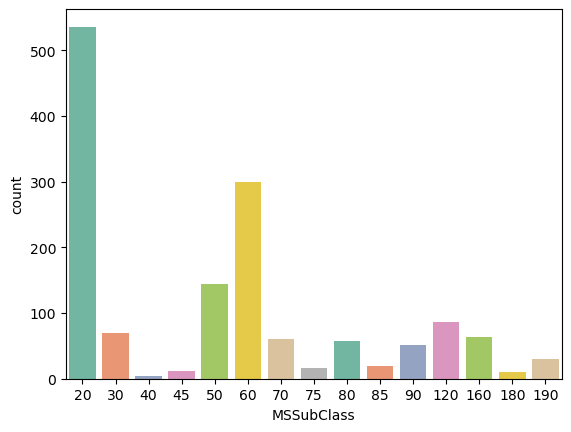

In [12]:
sns.countplot(data=df, x="MSSubClass" , palette="Set2") 

### Most of the houses are of single type (20 -> most frequent)
### Some houses are of medium size which are suitable for a family (50,60 MSSubClass)
### Very less houses are of large size

Text(0.5, 0, 'MSZoning')

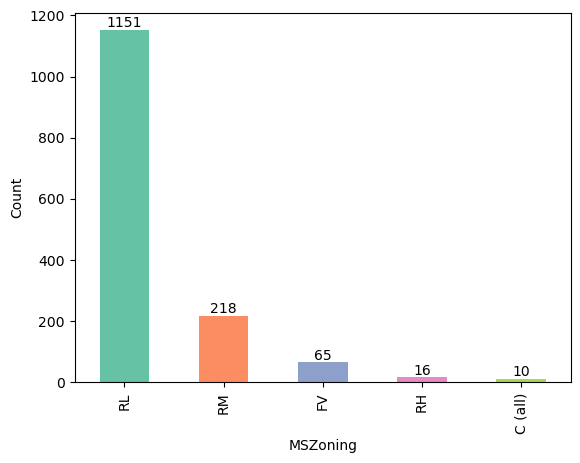

In [13]:
ax = df['MSZoning'].value_counts().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])
ax.set_ylabel('Count')
ax.set_xlabel('MSZoning')

### Most of the houses are of Residential low density(RL) and very few for commercial purpose -> shops and offices(C)
FV - Floating Village,
RM - Residential Medium Density,
RH - Residential High Density 

<Axes: xlabel='LotFrontage', ylabel='Count'>

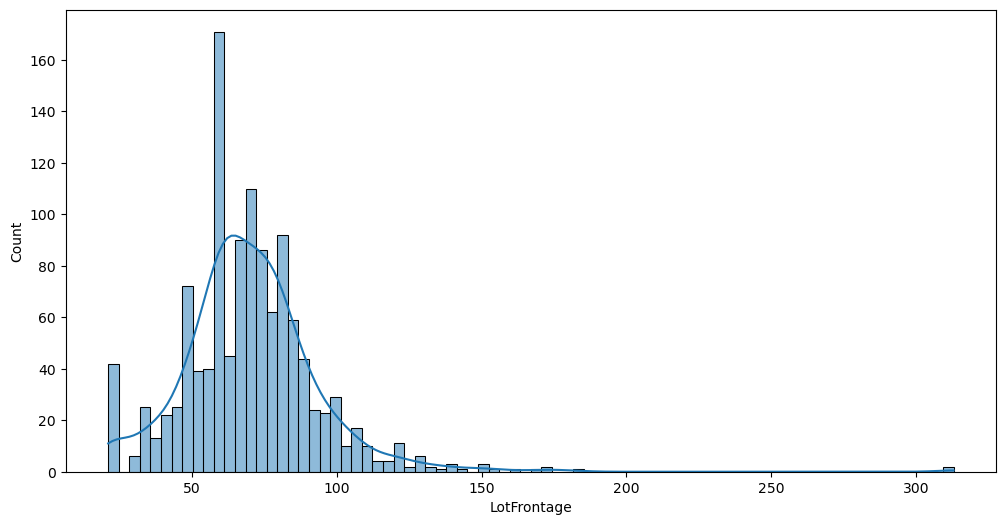

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="LotFrontage" , bins= 80 , kde = True)

### Most of the houses have Lotfrontage (Property ke aage jagah) of 60-80 sq. feet
### Very less no. of houses which have greater than 120 sq. feet Lotfrontage

<Axes: xlabel='LotArea', ylabel='Count'>

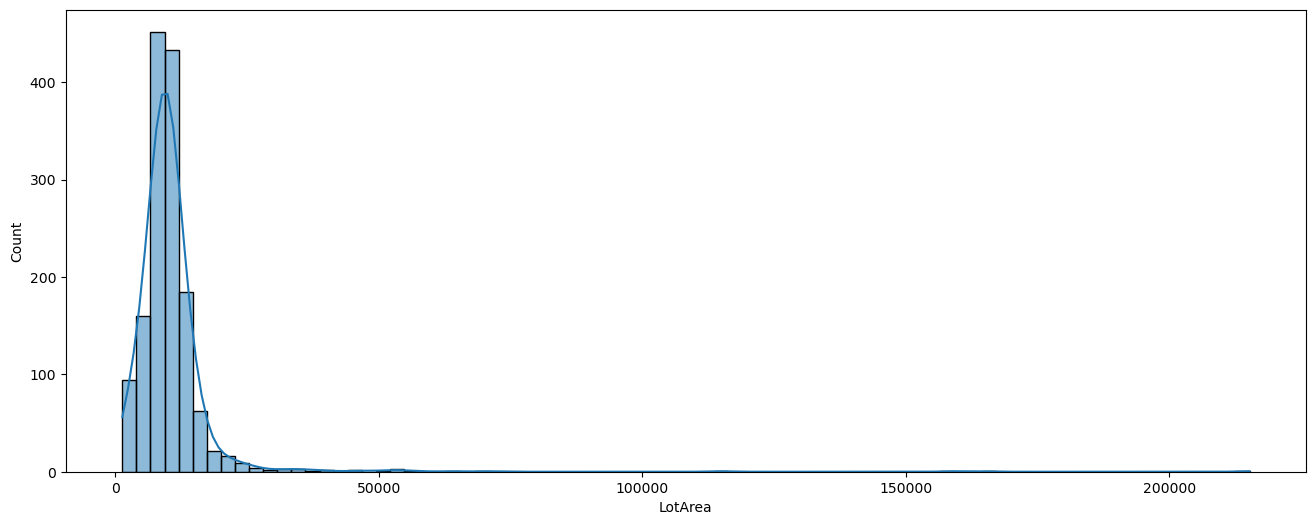

In [15]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x="LotArea" , bins = 80 , kde = True)

 The standard deviation of Lotarea is very high that implies the data is highly spreaded & from above we can see that some have very large area and many (>75%) has lot area of about 11000 sq. feet . Some outliers may also be present in this column

[Text(0, 0, '1454'), Text(0, 0, '6')]

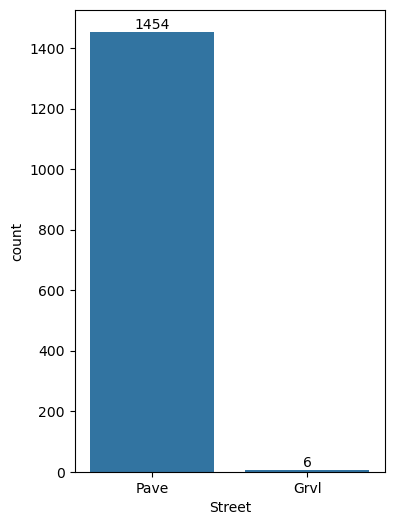

In [16]:
plt.figure(figsize=(4,6))
ax = sns.countplot(data=df, x="Street")
ax.bar_label(ax.containers[0])

### Most of thr houses have Pave Street (modern) and only 6 house have grvl street(less developed)

[Text(0, 0, '50'), Text(0, 0, '41')]

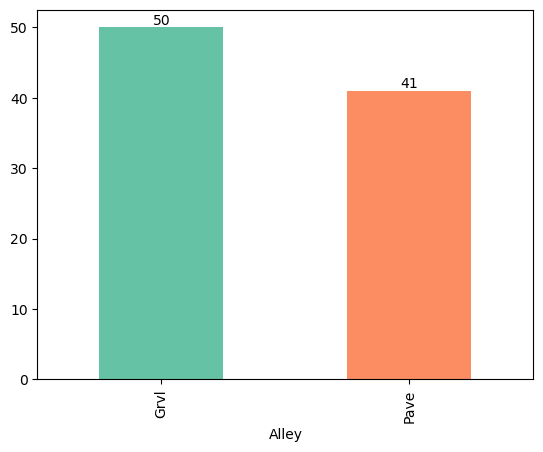

In [17]:
ax = df['Alley'].value_counts().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])

### There are only something 90 values total which tells there is lot of null values in this column 
### In this null values signifies there is no alley(small path) present around the houses.

Text(0, 0.5, '')

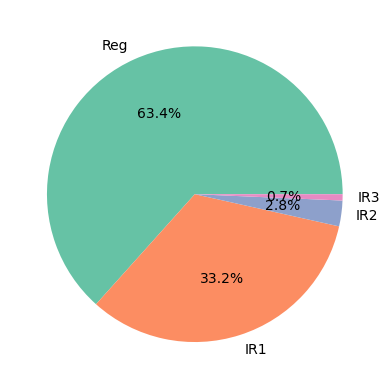

In [18]:
df['LotShape'].value_counts().plot.pie(labels=df['LotShape'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.ylabel('')

### Most of the houses have regular shape and very few are highly irregular in shape

[Text(0, 0, '1459')]

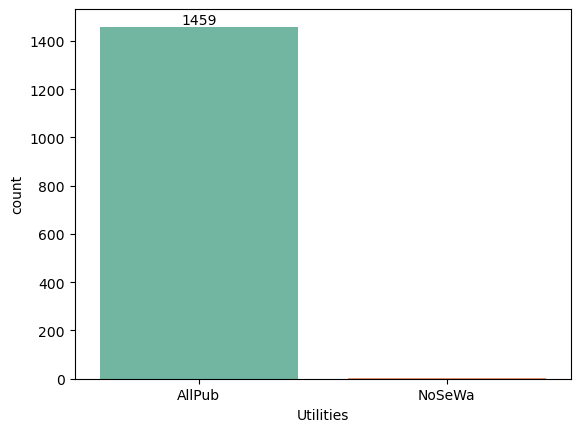

In [19]:
ax = sns.countplot(data=df, x="Utilities" , palette="Set2")
ax.bar_label(ax.containers[0])

### Excluding one All houses have All public facilities

<Axes: xlabel='OverallQual', ylabel='count'>

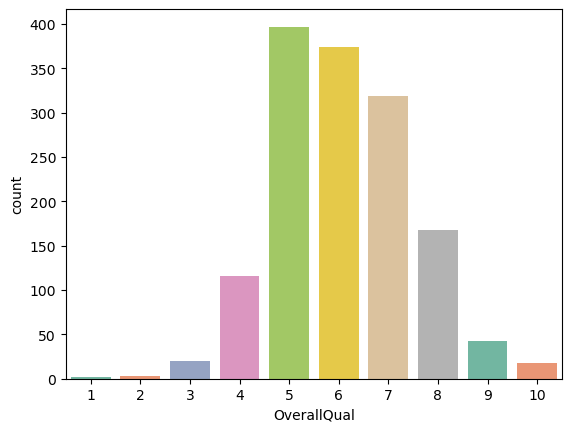

In [20]:
sns.countplot(data=df, x="OverallQual" , palette="Set2")

### Most of the houses have Quality rating of 5-7

<Axes: xlabel='OverallCond', ylabel='count'>

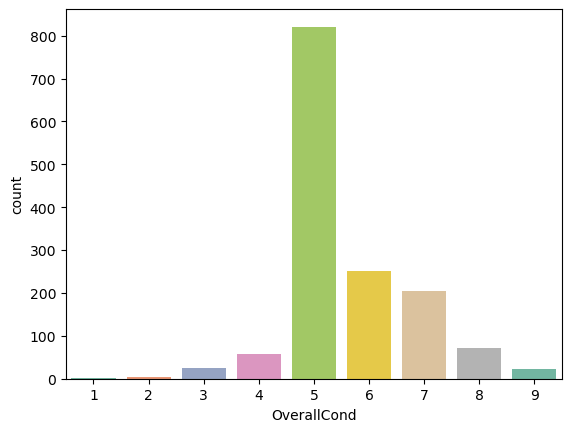

In [21]:
sns.countplot(data=df, x="OverallCond" , palette="Set2")   

### Most of the houses have overall condition rating of 5 which implies that quality of houses is average.

Text(0, 0.5, '')

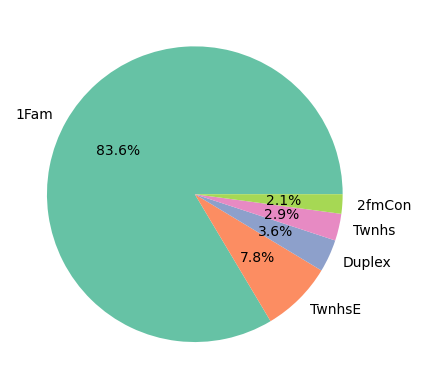

In [22]:
ax = df['BldgType'].value_counts().plot.pie(labels=df['BldgType'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.ylabel('')


### 83.6 Houses are are 1-Family Building Type

<Axes: xlabel='YearBuilt'>

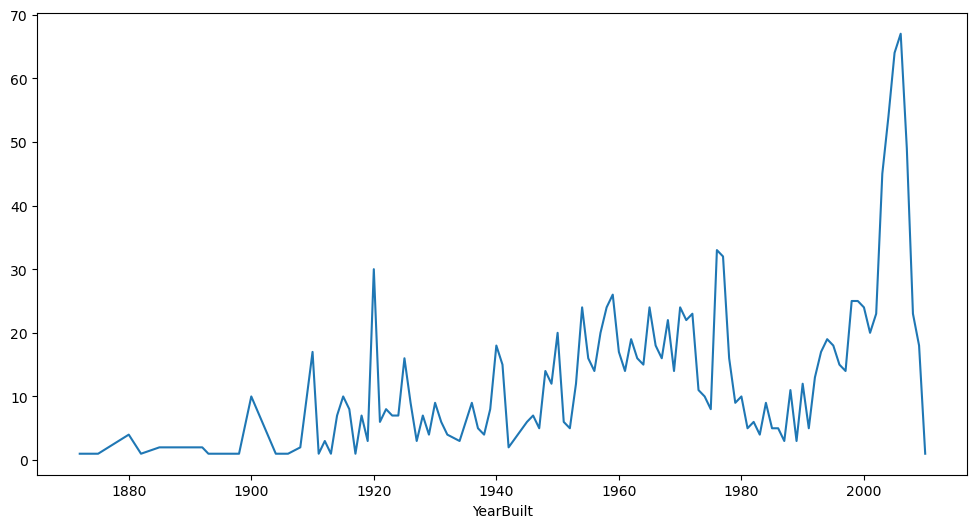

In [23]:
df['YearBuilt'].value_counts().sort_index().plot(kind='line', figsize=(12,6))

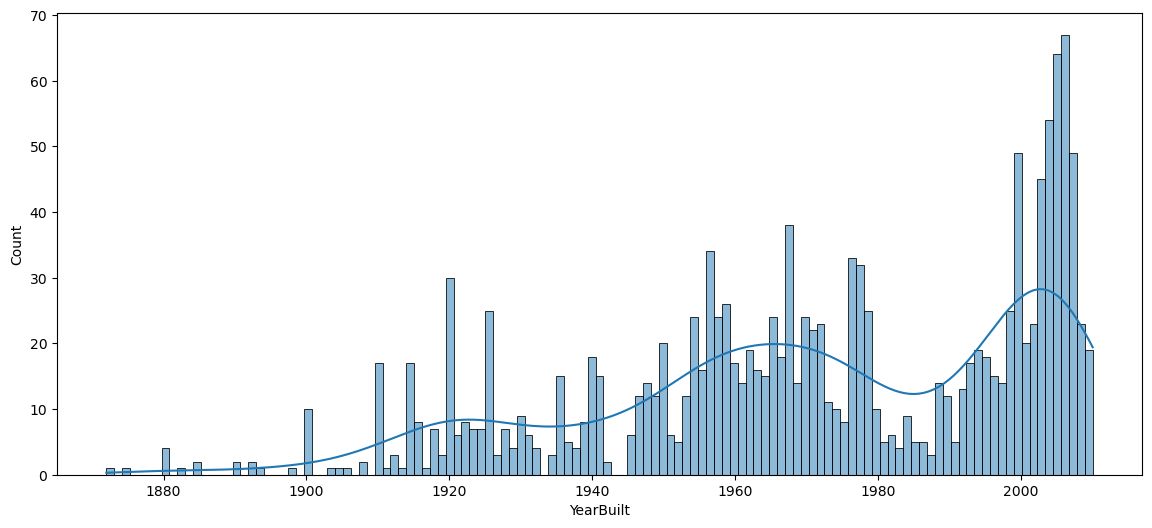

In [24]:
plt.figure(figsize=(14,6))
ax = sns.histplot(data = df , x = 'YearBuilt' , bins = 125 , kde = True)

### Large no. of houses are build after 2000 and also there are some years where no houses are build(initially)

Text(0.5, 1.0, 'Foundation Types')

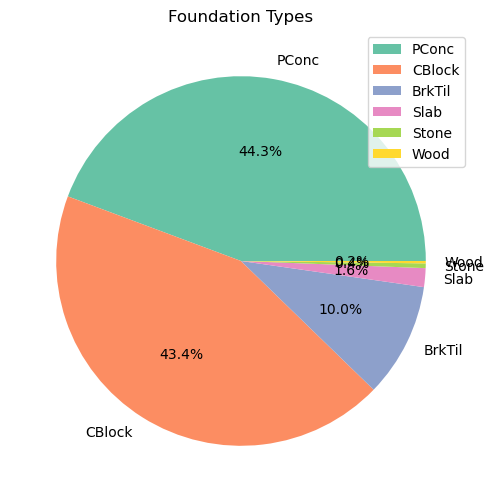

In [25]:
plt.figure(figsize=(10,6))
df['Foundation'].value_counts().plot.pie(labels=df['Foundation'].value_counts().index , autopct = '%1.1f%%', colors=sns.color_palette('Set2'), legend = True)
plt.ylabel('')
plt.title('Foundation Types')

### Most of the house have foundation of PConc('Modern & High Quality') and CBlock('hollow in middle') which states that Most of the houses have strong foundation while very few have wood and stone foundation(old method)

Text(0, 0.5, 'Count')

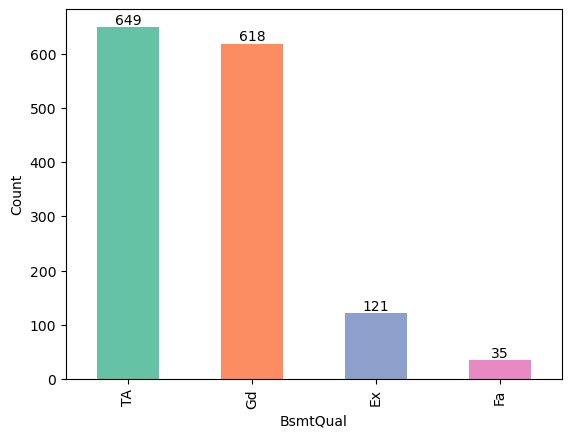

In [27]:
ax  = df['BsmtQual'].value_counts().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])
ax.set_ylabel('Count')

### More than 85% house's Basement Qual is Typical/average or good &  only 121 are of excellent quality

[Text(0, 0, '6'),
 Text(0, 0, '50'),
 Text(0, 0, '358'),
 Text(0, 0, '804'),
 Text(0, 0, '213'),
 Text(0, 0, '21'),
 Text(0, 0, '7'),
 Text(0, 0, '1')]

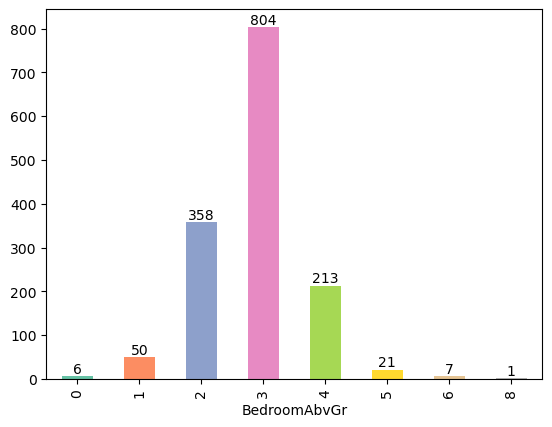

In [ ]:
ax = df['BedroomAbvGr'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])

### In mostly building there are 3 bedrooms above the Ground Floor & 6 building have 0 bedroom above GF

<Axes: xlabel='TotRmsAbvGrd', ylabel='count'>

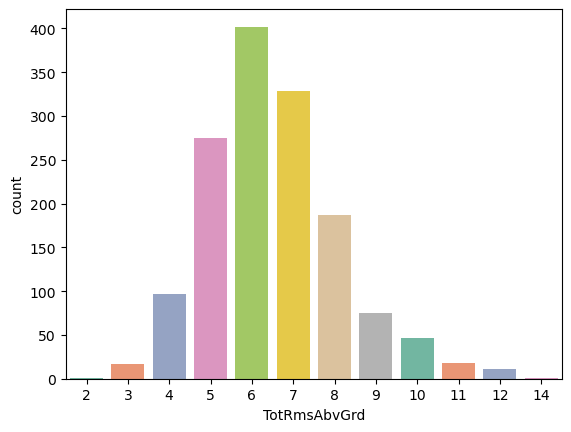

In [ ]:
sns.countplot(data=df, x="TotRmsAbvGrd" , palette="Set2") 

### most of the houses have 5-7 rooms above Gndfloor

<Axes: xlabel='GarageQual', ylabel='count'>

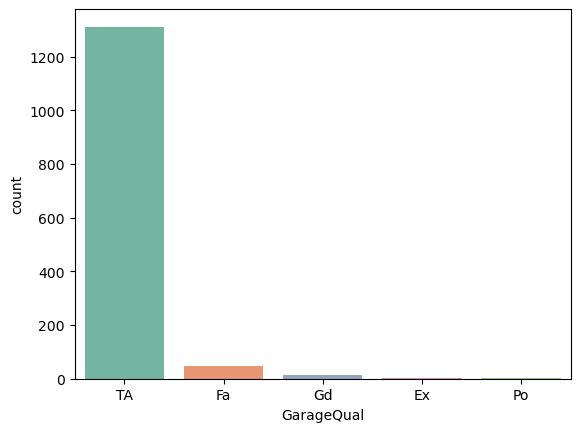

In [ ]:
sns.countplot(data=df , x = 'GarageQual' , palette = 'Set2')

### Most of the building has garage quality Typical/Average while only few have good quality Garage

[Text(0, 0, '1453')]

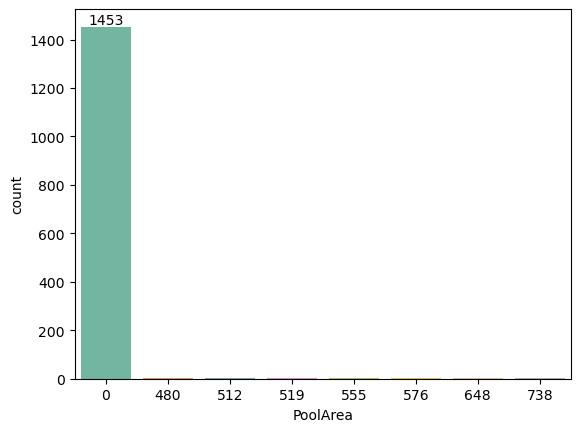

In [ ]:
ax = sns.countplot(data=df, x="PoolArea" , palette="Set2")
ax.bar_label(ax.containers[0])

### Only 7 houses have Pool available

<Axes: xlabel='MoSold', ylabel='count'>

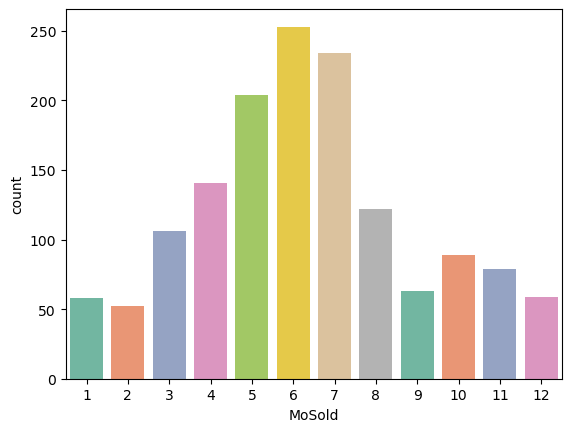

In [ ]:
sns.countplot(data=df, x="MoSold" , palette="Set2")

### Most of the house are sold in summer season (May-June-July)

[Text(0, 0, '314'),
 Text(0, 0, '329'),
 Text(0, 0, '304'),
 Text(0, 0, '338'),
 Text(0, 0, '175')]

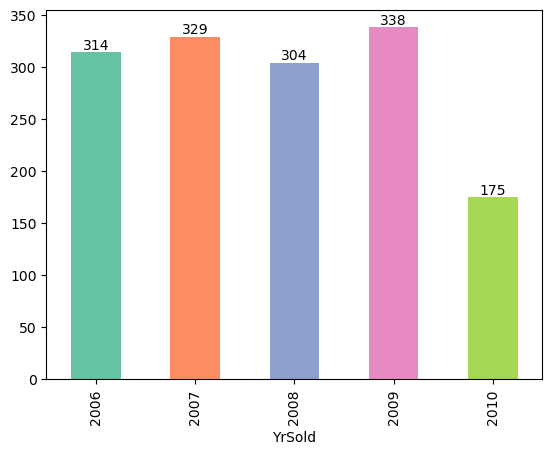

In [ ]:
ax = df['YrSold'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])

### The houses are sold almost in equal years except the 2010 which is obvious as there are 1460 houses in that

[Text(0, 0, '1267'),
 Text(0, 0, '122'),
 Text(0, 0, '43'),
 Text(0, 0, '9'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2')]

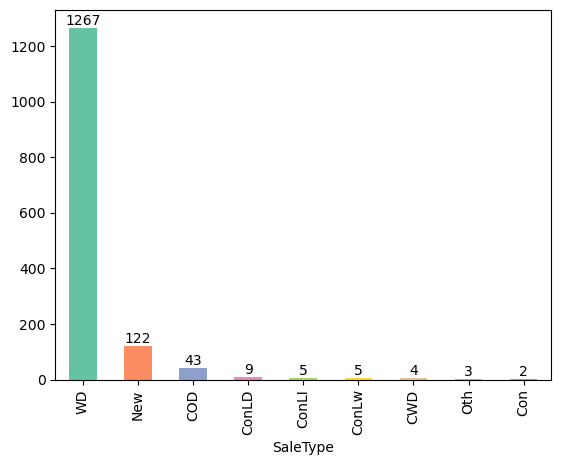

In [ ]:
ax = df['SaleType'].value_counts().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])

### Most houses are normally sold (WD) and 122 houses are newly built and sold instantly

[Text(0, 0, '1198'),
 Text(0, 0, '125'),
 Text(0, 0, '101'),
 Text(0, 0, '20'),
 Text(0, 0, '12'),
 Text(0, 0, '4')]

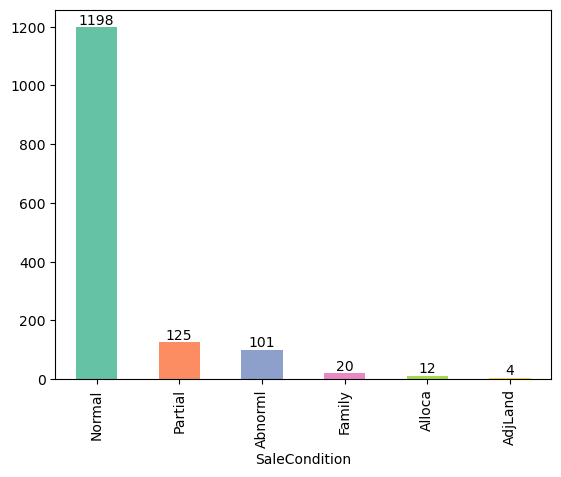

In [ ]:
ax = df['SaleCondition'].value_counts().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])

### Most houses are normally sold and 125 houses are not completed yet while 4 houses are sold in place od adjacent land 

<Axes: xlabel='SalePrice', ylabel='Count'>

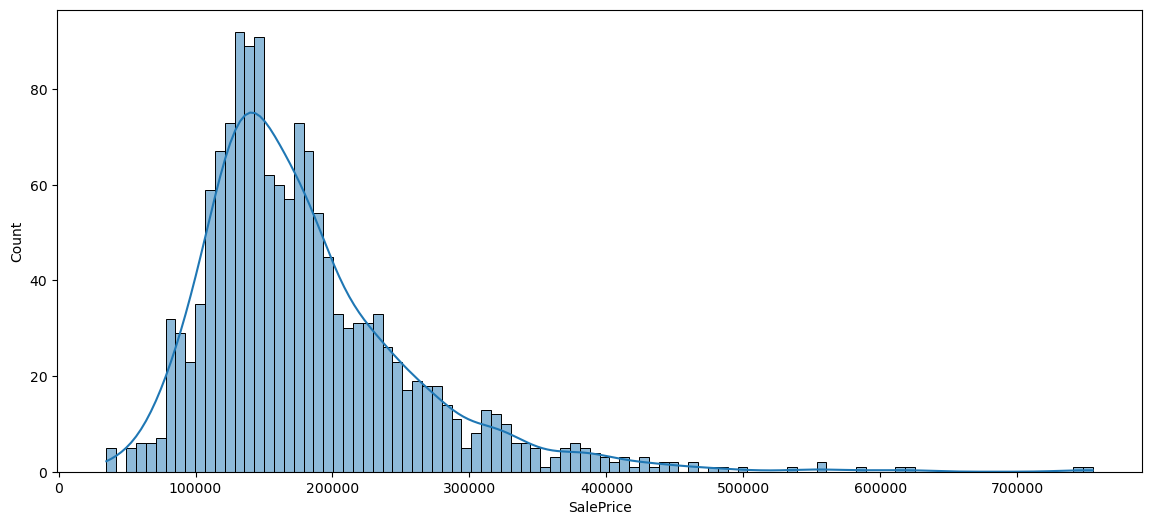

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data = df , x = 'SalePrice' , bins = 100 , kde = True) 

### Most of the houses ranges from 1 Lakh to 2 Lakh

<br>
<br>
<br>

# SUMMARY OF UNIVARIATE ANALYSIS 

-> Most of the houses are of 1-Family Type(83.6%) & very few are of large size<br>
-> Most of the houses have Low Residential Density which offers space for the families for better living and privacy & very few for Commercial purpose<br>
-> Most houses have Lotfrontage area(property ke aage ki jgh ) of 60-80 sq.feet<br>
-> Most houses have LotArea below 10000 sq.feet<br>
-> Most houses have Pave Street(Modern)(1454) and 6 houses have Gravel(less deve.)<br>
-> There are 41 houses have Pave Alley & 50 houses have Grvl Alley and rest have no Alley<br>
-> Around 63% houses have Regular shape and very few are highly irregular in shape<br>
-> Excluding one All houses have public facilities<br>
-> Most houses have overall condition rating of 5 which implies houses are in average condition<br>
-> Most of the houses have Quality Rating of 5-7 <br>
-> After 2000 , there is rapid increase in house building<br>
-> Most houses have foundation type of PConc(Modern & High Qual) and CBlock(hollow in middle) , very few have wood or stone found. type <br>
-> More than 85% house's Basement Quality is Typical/Average or Good & 121 houses have excellent Quality <br>
-> In mostly building there are 3 bedrooms & 5-7 rooms above ground floor<br>
-> Most building have Typical/Average Garage Quality<br>
-> Only 7 houses have Pool Availability<br>
-> Most of the houses are sold in summer season <br>
-> The houses are sold equally over the years from 2006 to 2009<br>
-> Most houses are sold normally & 122 houses newly build and instantly build while 125 are sold but not completed yet. 4 houses are sold in place of adjacent land<br>
-> Most house's have price ranges from 1 Lakh to 2 Lakh <br>
<br>
<br>

# HEATMAP FOR STANDING CORRELATION

<Axes: >

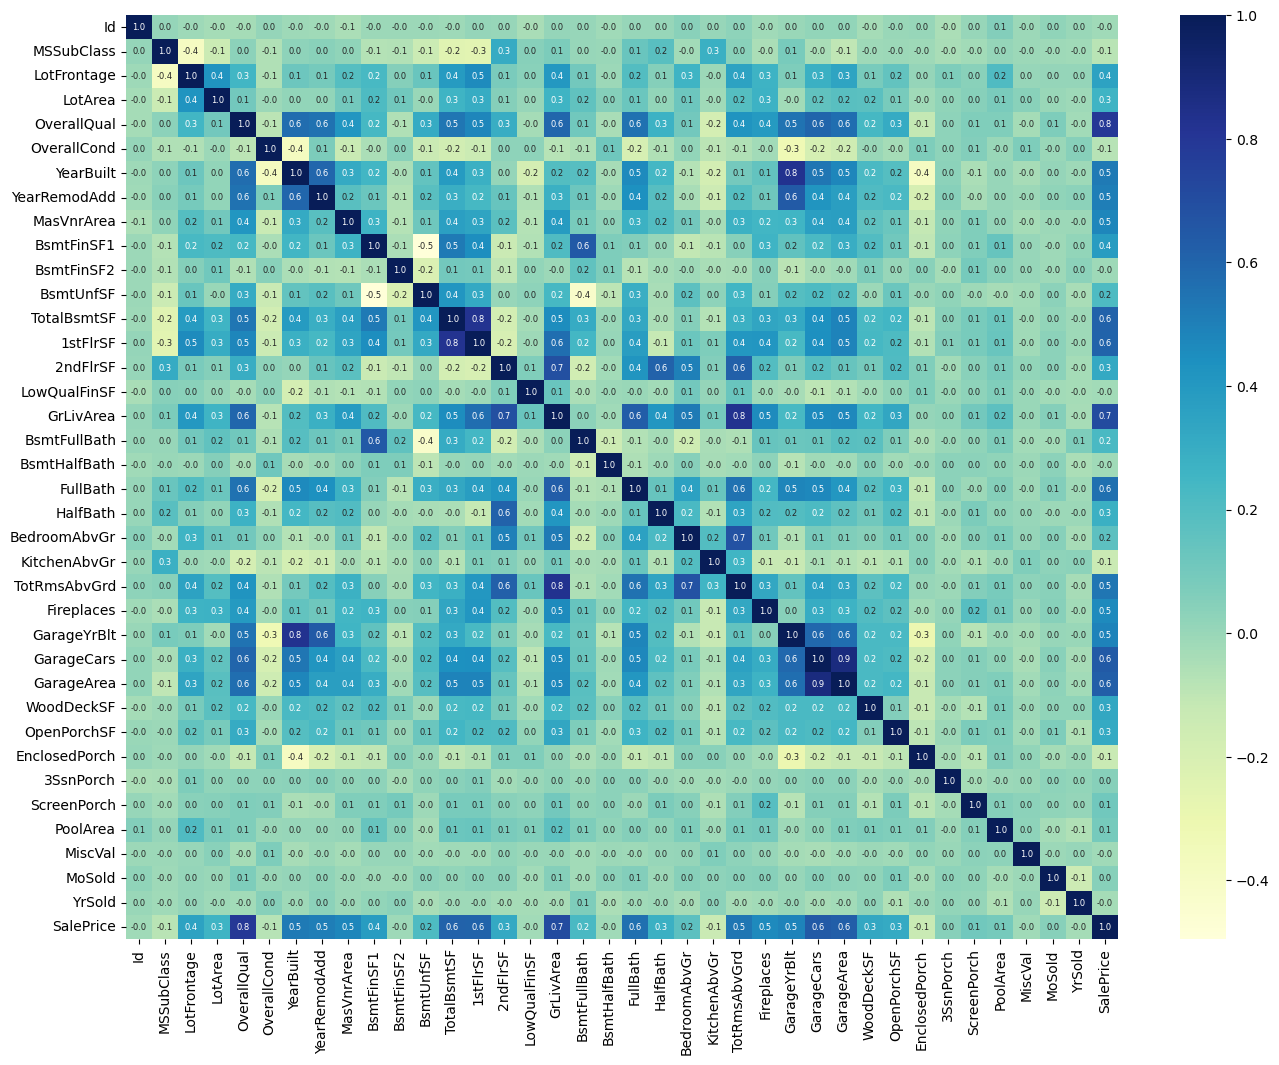

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only = True) , annot = True , fmt = '.1f' , cmap = 'YlGnBu' , annot_kws = {'size':6})

### By analyzing the heatmap we select the following column for Bivariate analysis
<br>
-> SalePrice with OverallQual , YearBuilt , TotalBsmtSF , GrLivArea , GarageArea , GarageCars <br>
-> GarageYrBlt with YearBuilt  <br>
-> TotRmsAbvGrd with GrLivArea , BedroomAbvGrd <br>
-> GrLivArea with 2ndFlrSF <br>
-> LotArea vs LotFrontage<br>
<br>
<br>

# BIVARIATE ANALYSIS 

<Axes: xlabel='YearBuilt', ylabel='GarageYrBlt'>

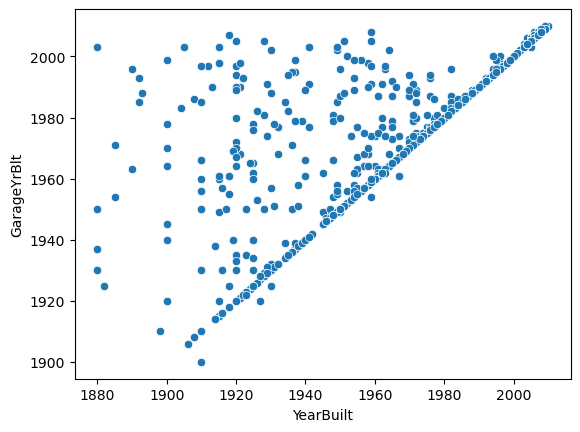

In [ ]:
sns.scatterplot(data = df , x = 'YearBuilt' , y = 'GarageYrBlt' )

### Before 1980 , some house's garage yr is built after its house yr built but after 1980 the house and garage yr is built in same year

(0.0, 200.0)

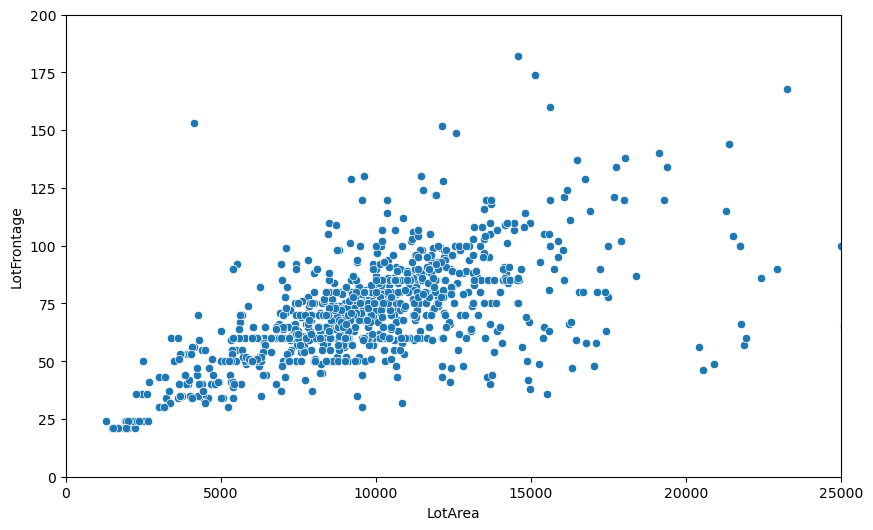

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df , x = 'LotArea' , y = 'LotFrontage')
plt.xlim(0,25000)
plt.ylim(0,200)

### The houses that have LotArea b/w 7500 and 13000 mostly have 50-80 sq.feet LotFrontage Area

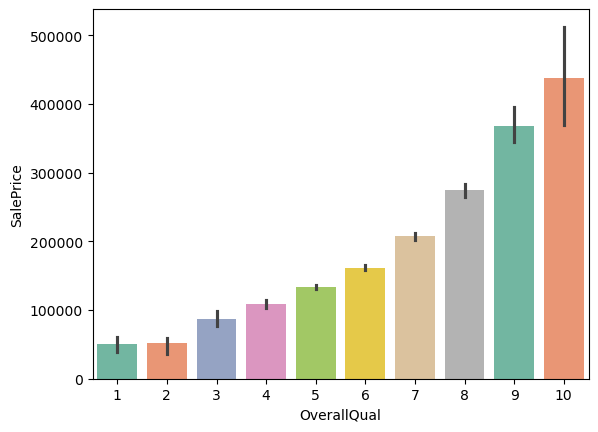

In [ ]:
ax = sns.barplot(data = df , x = 'OverallQual' , y = 'SalePrice' , palette = 'Set2')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

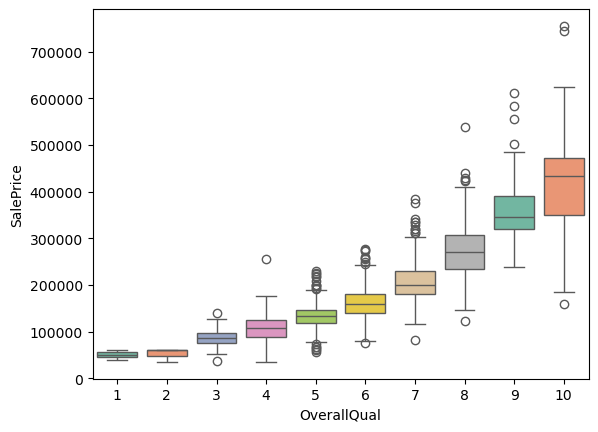

In [ ]:
sns.boxplot(data = df , x = 'OverallQual' , y = 'SalePrice' , palette = 'Set2')

### The house that have greater OverallQuality have high SalePrice

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

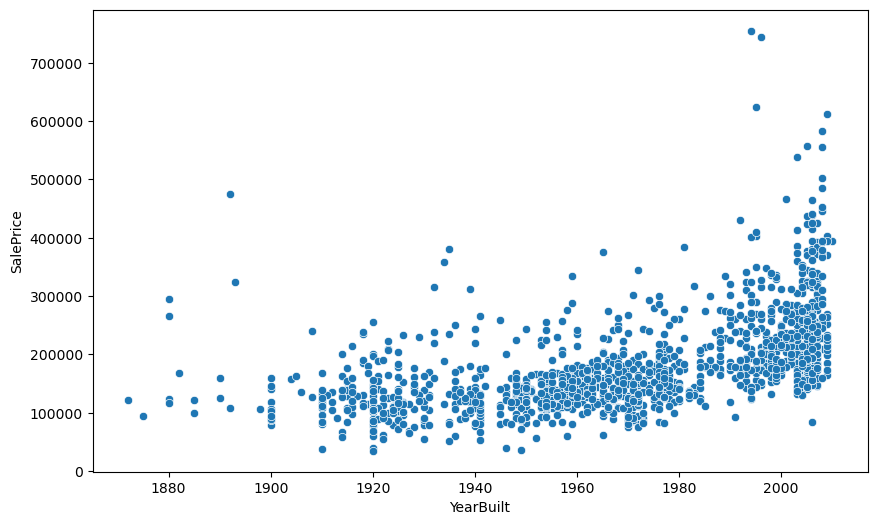

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df , x = 'YearBuilt' , y = 'SalePrice')

### There isnot much difference in saleprice on the basis of yearbuilt but house which have built after 2000 have higher prices may be due to modern foundation , excellent quality of houses 

(0.0, 600000.0)

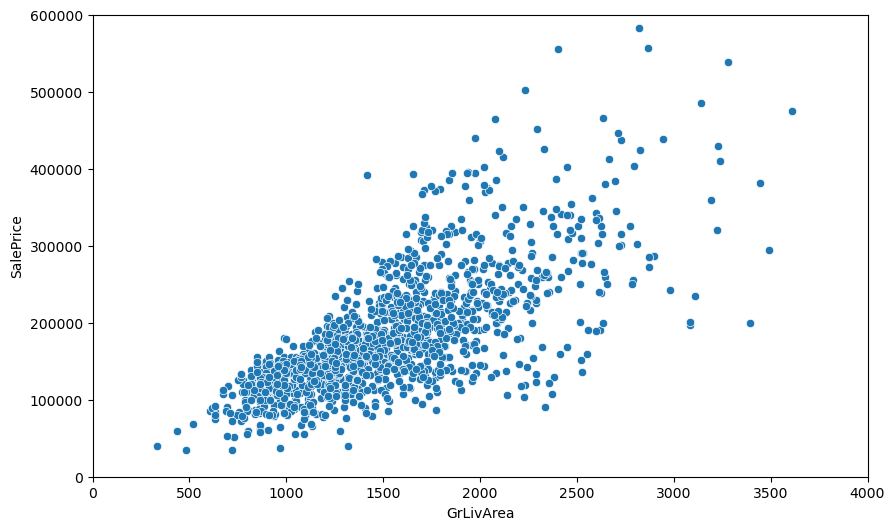

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df , x = 'GrLivArea' , y = 'SalePrice')
plt.xlim(0,4000)
plt.ylim(0,600000)

### The distribution is linearly increasing
### The house which have high Groundliving Area are sold at high prices

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

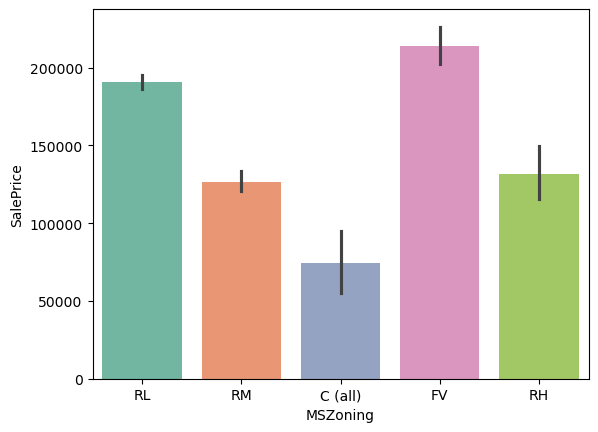

In [ ]:
sns.barplot(data = df , x = 'MSZoning' , y = 'SalePrice' , palette = 'Set2')

In [ ]:
df.groupby('MSZoning')['SalePrice'].mean()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

### The average salePrice of FV - Floating village is highest that means these are luxurious houses and are at very good location like riverside extraspace while in RL - Residence low density having more houses have less average thta means the price of houses vary so much that is some are of better quality and some not

Text(0, 0.5, '2ndFlrSF')

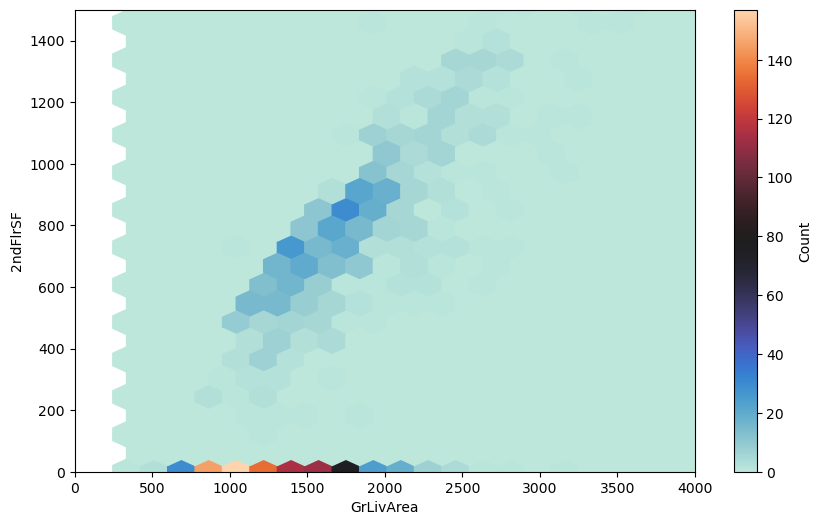

In [ ]:
plt.figure(figsize=(10,6))
plt.hexbin(data=df , x = 'GrLivArea' , y = '2ndFlrSF' , gridsize=30, cmap='icefire')
plt.xlim(0,4000)
plt.ylim(0,1500)
plt.colorbar(label='Count')
plt.xlabel('GrLivArea')
plt.ylabel('2ndFlrSF')

In [ ]:
df.loc[df['2ndFlrSF'] == 0 , 'GrLivArea'].count()

np.int64(829)

### Most of the houses have no 2nd Floor even having Ground living Area while others are almost linearly varies with Ground living area

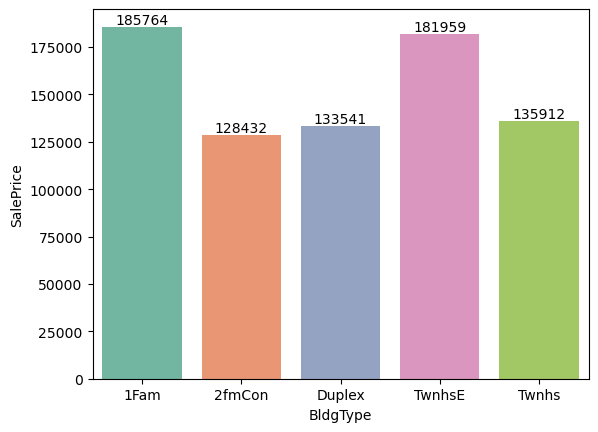

In [31]:
ax = sns.barplot(data = df , x = 'BldgType' , y = 'SalePrice'  ,  estimator = np.mean , palette = 'Set2' , ci = None)
for container in ax.containers:
    ax.bar_label(container) 

### The average price of 1Fam - Single Family Detached house is highest and also TwnhsE - houses that share only one wall have similar price 

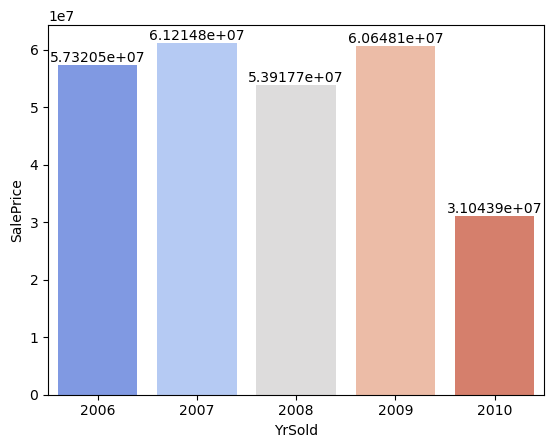

In [33]:
ax = sns.barplot(data=df , x = 'YrSold' , y = 'SalePrice' , estimator = sum ,  palette = 'coolwarm' , ci=None)
for container in ax.containers:
    ax.bar_label(container)

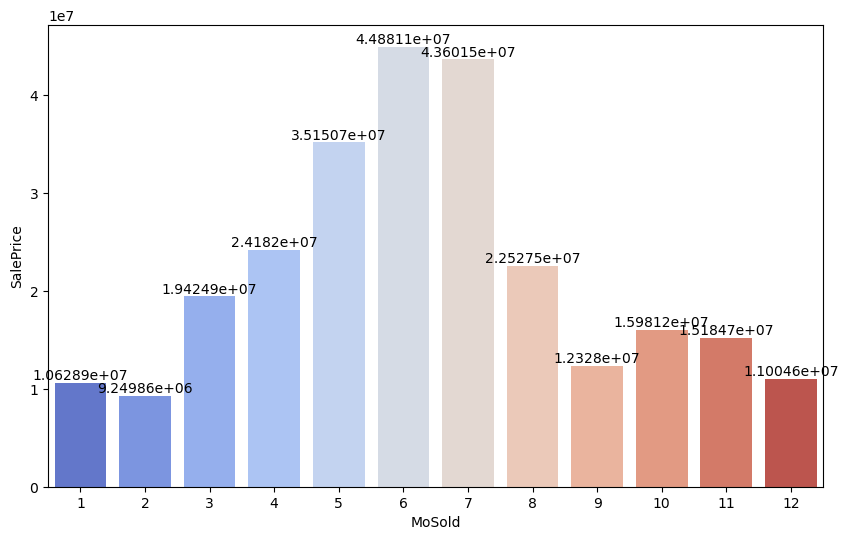

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df , x = 'MoSold' , y = 'SalePrice' , estimator = sum  , palette = 'coolwarm' , ci = None)
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
df['SalePrice'].sum()

np.int64(264144946)

In [ ]:
df.groupby('YrSold')['SalePrice'].sum().sort_values(ascending=False)

YrSold
2007    61214777
2009    60648051
2006    57320530
2008    53917695
2010    31043893
Name: SalePrice, dtype: int64

In [ ]:
df.groupby('MoSold')['SalePrice'].sum().sort_values(ascending=False)

MoSold
6     44881121
7     43601499
5     35150683
4     24181960
8     22527523
3     19424916
10    15981194
11    15184662
9     12328042
12    11004619
1     10628863
2      9249864
Name: SalePrice, dtype: int64

### Highest revenue is generated in 2006,07,09 and in the summer months like May , June , July while lowest revenue is generated in 2010 and in winter months like Dec , Jan , Feb
### Total revenue generated = 26.5 crore
### In summer months(May,June,July) = 12 crore

<br>
<br>

# SUMMARY OF BIVARIATE ANALYSIS

-> After 1980 , Garage and houses are built together<br>
-> The houses that have LotArea b/w 7500 & 13000 mostly have 50-80 sq.feet LotFrontage Area<br>
-> The houses that have greater OverallQuality have high SalePrice<br>
-> There is not much difference in saleprice on the basis of yrbuilt but house which are built after 2000 have higher prices may be due to modern foundatoon , excellent quality<br>
-> The house which have high Groundliving Area are sold at higher Price <br>
-> The average sale price of Floating village is highest that means they are at special location and greater Lot Area<br>
-> Most of the house have no 2nd Floor<br>
-> The average price of 1-Fam (Sinle family Detached) & TwnhsE(houses that share only one wall) are higher <br>
-> Highest revenue is generated in summer months (May , June , July) = 12 Crores <br>
-> Total revenue generated = 26.4 crores

<br>
<br>

# MULTIVARIATE ANALYSIS

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

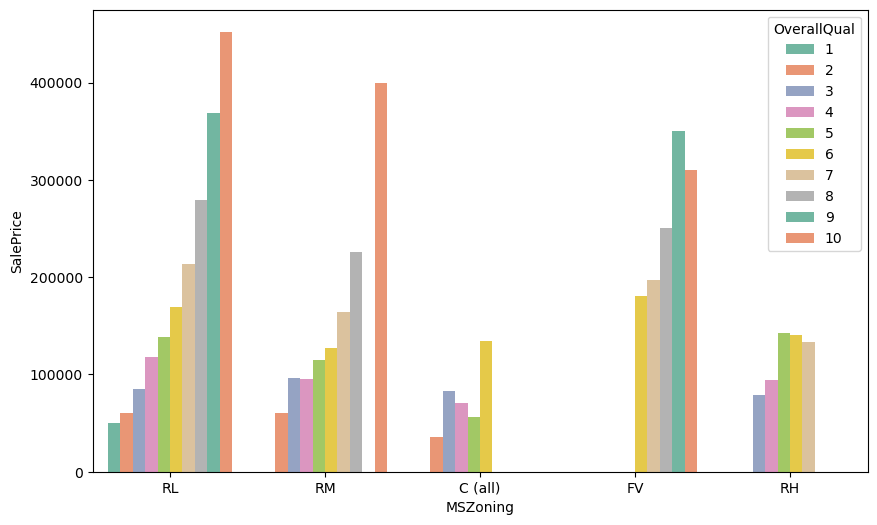

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data = df , x = 'MSZoning' , y = 'SalePrice' , hue = 'OverallQual', palette = 'Set2' , ci=None) #CI : Confidence Interval(shows uncertainity)

### The houses which are categorised as RM - (Moderate Residential Density) doesn't have 1 & 9 Overallual Rating and FV - Floating Village has Overall Quality Rating greater than 5 which implies that houses of this category are of excellent quality. 
### Houses of RL - (Residential low Density) have all types & which have high Quality have higher SalePrice

(0.0, 600000.0)

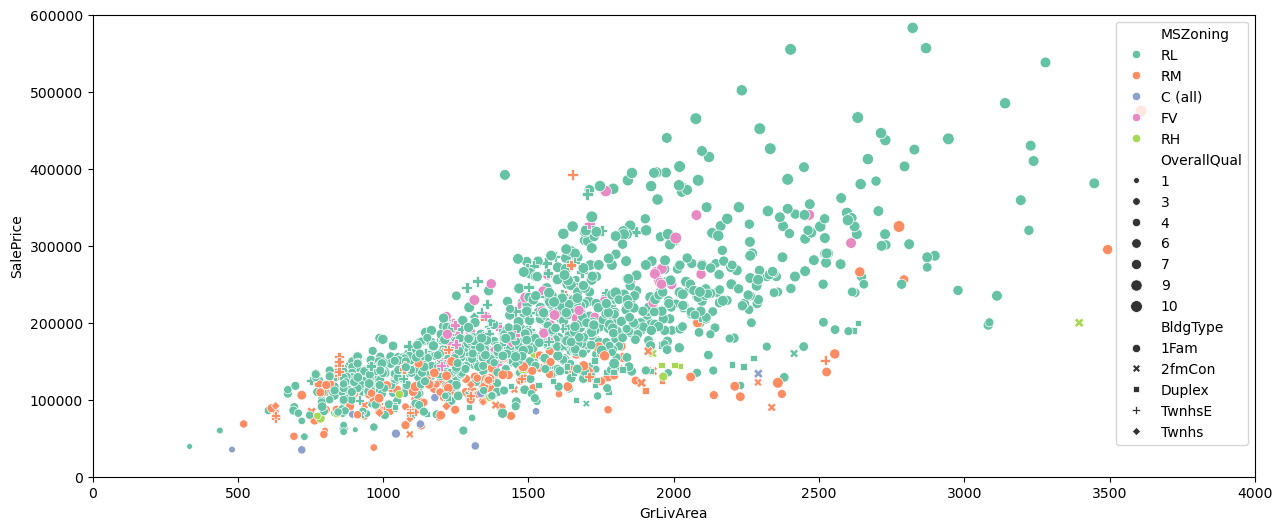

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = df , x = 'GrLivArea' , y = 'SalePrice' , hue = 'MSZoning' , style = 'BldgType' , size = 'OverallQual' ,  palette = 'Set2' )
plt.xlim(0,4000)
plt.ylim(0,600000)

### 1-Fam RM Saleprice doesn't highly depend on GrLivArea but 1-Fam RL is almost linearly dependent on GrLivArea  

(0.0, 20000.0)

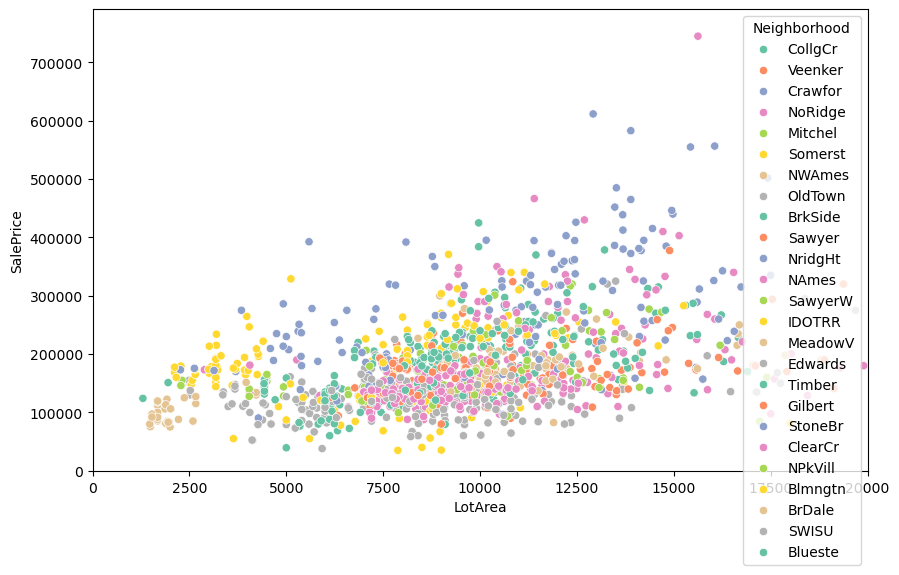

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df , x = 'LotArea' , y = 'SalePrice' , hue = 'Neighborhood' , palette = 'Set2')
plt.xlim(0,20000)

### The houses whose neighbourhood are CRAWFOR , NRIDGHT , STONEBR generally have higher prices showing that they are at the best location while whose neighbourhood's are OldTown , Edwards , SWISU have generally low prices 

<Axes: >

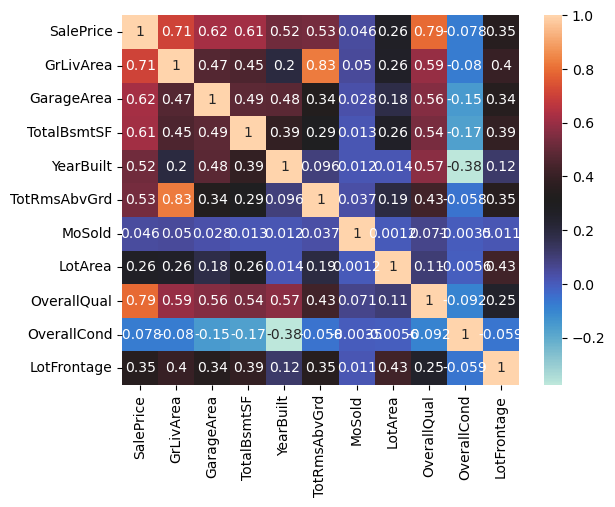

In [ ]:
cols = ['SalePrice' , 'GrLivArea' , 'GarageArea' , 'TotalBsmtSF' , 'YearBuilt' , 'TotRmsAbvGrd' , 'MoSold' , 'LotArea' , 'OverallQual' , 'OverallCond' , 'LotFrontage']
corr = df[cols].corr()
sns.heatmap(corr , annot = True , cmap = 'icefire')

### SalePrice is majorily dependent on GroundlivingArea , GarageArea , TotalBsmntArea in sq. feet 
### Total RoomsAboveGround is highly dependent on GroundLivingArea which tells that buildings have not more floors
### SalePrice is not dependent on in which month House is sold still people are buying in summer months . One reason could be of Weather , School , transportation convenience

([0, 1, 2, 3, 4],
 [Text(0, 0, 'RL'),
  Text(1, 0, 'RM'),
  Text(2, 0, 'C (all)'),
  Text(3, 0, 'FV'),
  Text(4, 0, 'RH')])

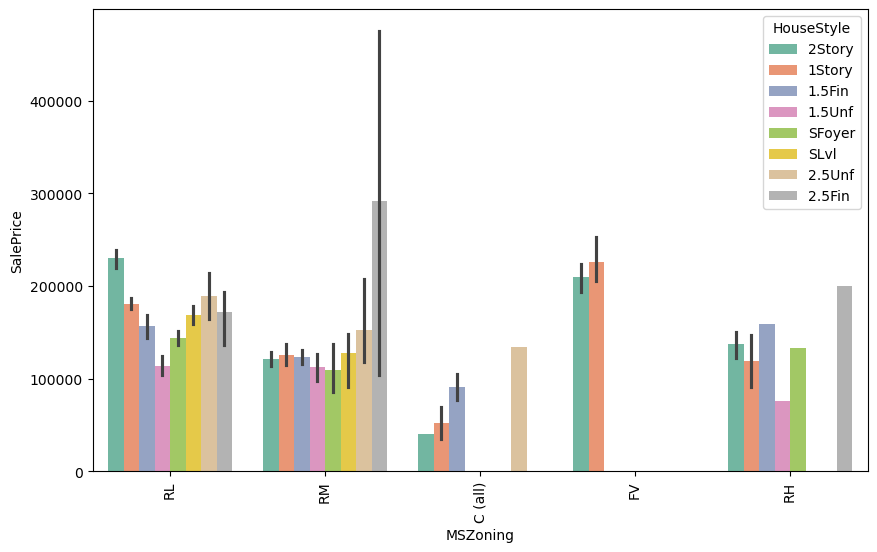

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data = df , x = 'MSZoning' , y = 'SalePrice' , hue = 'HouseStyle' , palette = 'Set2')
plt.xticks(rotation=90)

### In RL - Houses of 2-story have generally higher prices
### In RM - Houses of 2.5Fin have higher prices 
### In FV - Only 1-story and 2-story houses are present and almost have equal prices 

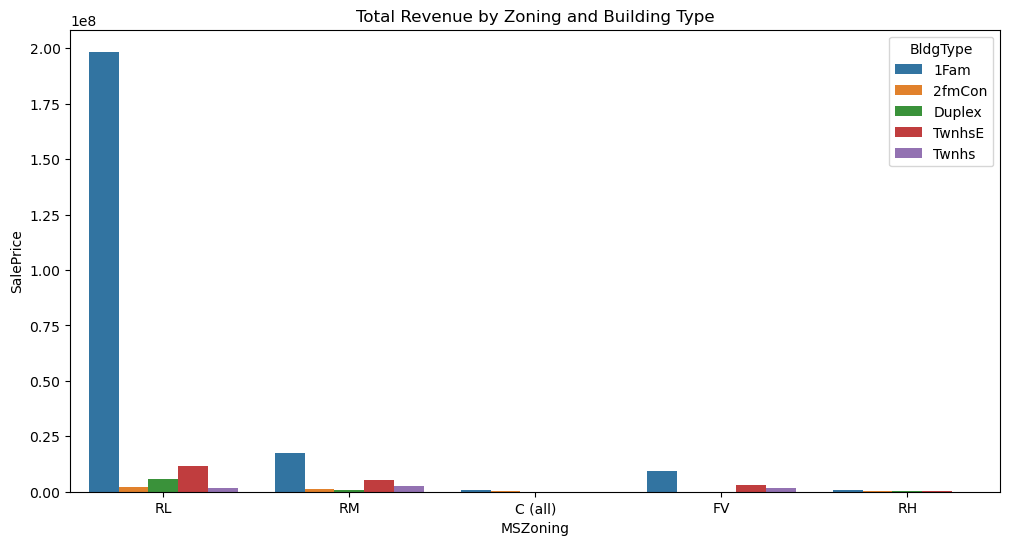

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="MSZoning", y="SalePrice", hue="BldgType", data=df , estimator=sum , ci = None)
plt.title("Total Revenue by Zoning and Building Type")
plt.show()


### The highest revenue is generated from the 1-Fam and RL houses . So , we can prefer making 1 Fam houses in future as people prefer these more.

<br>

# SUMMARY OF MULTIVARIATE 

-> Floating village have overall quality rating for every house is greater than 5 which implies that houses of FV is of excellent quality and at special location<br>
-> Houses of Resisdence low Quality is of all types from 1 to 9 Overall Quality and have more prices which have high Quality Rating<br>
-> 1-Fam RM house Saleprice doesn't depend on GrLivArea but 1-FAm RL houses are almost linearly dependent on GrLivArea<br>
-> The houses whose neighbourhood are CRAWFOR , NRIDGHT , STONEBR generally have higher prices showing that they are at best location.<br>
-> SalePrice of the houses is majorily dependent on OverallQual > GroundLivingArea > GarageArea > TotalBsmntArea.<br>
-> Total rooms is highly dependent on GrLivArea which tells buildings have not more floors<br>
-> SalePrice is not dependent on in which month house is sold but people still prefer buying in summer months one reason could be that Shifting of furniture , Weather , School holidays<br>
-> In RL - Houses of 2 story have generally higher prices <br>
-> In RM - Houses of 1.5Fin have higher prices <br>
-> In FV only 1-story & 2-story houses are present and almost have equal prices<br>
-> The highest revenue is generated from 1-Fam and Rl houses . So in future , we can prefer making 1-Fam RL houses as it is demand of citizens.

<br>
<br>
<br>

# OVERALL SUMMARY 

-> 83.6% houses are of 1-Family type and they contributing highest in the Revenue generation<br>
-> Excluding 6 , All houses have Pave Street(Modern & Clean)<br>
-> Only 91 houses (50{Pave} + 41{Grvl}) have Alley(a small street)<br>
-> Around 63% houses have Regular shape , very few are irregular<br>
-> Most houses have Quality rating of 5-7 which shows max. houses are of typical/average quality<br>
-> After 2000 , there is a rapid increase in house building<br>
-> there are 3 bedrooms & 5-7 rooms above grndfloor in max. houses<br>
-> Only 7 houses have pool availability<br>
-> Most of the houses are sold in summer months {May,June,July} but equally over the years<br>
-> Most houses have price range from 1 lakh to 2 lakh <br>
-> After 1980 , Garage & houses are built together<br>
-> Houses of Lotarea b/w 7500 & 13000 mostly have 50-80 sq.feet LotFrontage Area<br>
-> There is not much difference in Saleprice on th basis of yrbuilt but houses which built after 2000 generally have high price mainly due to Modern basement foundation , excellent quality<br>
-> Most of the have only 1-Floor (no 2-floor)<br>
-> Floating Village(FV) have overall Quality rating greater than 5 and also have highest average SalePrice which indicates that they are at special locations and are of excellent quality<br>
-> The houses whose neighborhood are CrawFor , Nridght , StoneBr have higher prices indicating these are best locations <br>
-> 1 Family RL houses SalePrice are almost linearly dependent on GrLivArea <br>
-> The highest revenue is generated from 1Fam & RL houses. So in future , We can focus on building more RL & 1Fam houses so more revenue can be generated<br>
-> Actually , Sale Price is not dependent on which month House is sold but people prefer buying in summer months mainly due to weather , school holiday , furniture shifting <br>
-> Houses whose quality is higher have higher prices <br>
-> Revenue generated in summer months over the years = 12 crore<br>
-> Total Revenue Generated = 26.4 crores